In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm as tqdm
from wordcloud import WordCloud, STOPWORDS,ImageColorGenerator
from PIL import Image

# Exploratory Data Analysis


# Twitter

In [22]:
df_twitter=pd.read_csv('/content/drive/MyDrive/Final Year Project/data/Twitter Combined.csv')
df_twitter.head(10)

,oh_label,Text
0,1.0,@AAlwuhaib1977 Muslim mob violence against Hin...
1,0.0,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG
2,1.0,@jncatron @isra_jourisra @AMPalestine Islamoph...
3,0.0,"Finally I'm all caught up, and that sudden dea..."
4,0.0,@carolinesinders @herecomesfran *hugs*
5,0.0,"Please, PLEASE start using ""is your discernmen..."
6,0.0,@aymannathem As soon as ISIS chased all the mi...
7,0.0,@Ali_Gharib @MaxBlumenthal Glad you like it. h...
8,1.0,@HuffPostRelig Islam invaded and conquered 2/3...
9,1.0,@semzyxx Do you approve of your pedophile prop...


In [23]:
df_twitter.shape

(28352, 2)

In [24]:
df_twitter['oh_label'].isnull().any()

True

In [25]:
df_twitter.dropna()

,oh_label,Text
0,1.0,@AAlwuhaib1977 Muslim mob violence against Hin...
1,0.0,@Te4m_NiGhtM4Re http://t.co/5Ih7MkDbQG
2,1.0,@jncatron @isra_jourisra @AMPalestine Islamoph...
3,0.0,"Finally I'm all caught up, and that sudden dea..."
4,0.0,@carolinesinders @herecomesfran *hugs*
...,...,...
28347,0.0,@RaikonL @finaleve @mja333 WHY DO YOU HATE FRE...
28348,0.0,It is unconscionable that our regulatory bodie...
28349,0.0,@Dartanveerahmad @Janx53 @geehall1 We want ISI...
28350,0.0,#mkr Unbelievable how low Kat &amp; Andre wil...


In [26]:
pos_count_twitter=df_twitter['oh_label'].value_counts()[1]
neg_count_twitter=df_twitter['oh_label'].value_counts()[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


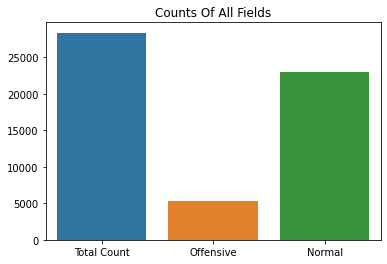

In [27]:
plt.title('Counts Of All Fields')
#plt.subplots(figsize=(20,4))
sns.barplot(['Total Count','Offensive','Normal'],[df_twitter.shape[0],pos_count_twitter,neg_count_twitter])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


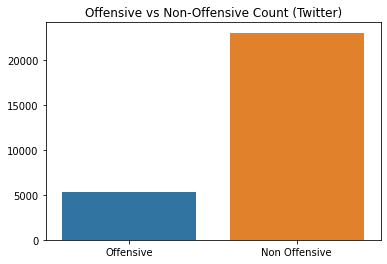

In [28]:
plt.title('Offensive vs Non-Offensive Count (Twitter)')
sns.barplot(['Offensive','Non Offensive'],[pos_count_twitter,neg_count_twitter])
plt.show()

In [29]:
df_twitter=df_twitter.loc[df_twitter['oh_label']==1.0]

In [30]:
df_twitter

,oh_label,Text
0,1.0,@AAlwuhaib1977 Muslim mob violence against Hin...
2,1.0,@jncatron @isra_jourisra @AMPalestine Islamoph...
8,1.0,@HuffPostRelig Islam invaded and conquered 2/3...
9,1.0,@semzyxx Do you approve of your pedophile prop...
10,1.0,@watan71969 @geeky_zekey Problem with vile Mus...
...,...,...
28333,1.0,RT @lukeyook: If they think that dessert is re...
28340,1.0,Girls claiming they're hot generally have an o...
28342,1.0,"RT @ur_so_vanilla: Nikki &amp; Katie, didn't y..."
28343,1.0,DID U WRITE THAT URSELF OMG @joeldanger All gi...


In [31]:
lst=list(df_twitter['Text'].astype('str'))
print(lst[:5])

['@AAlwuhaib1977 Muslim mob violence against Hindus in Bangladesh continues in 2014. #Islam http://t.co/C1JBWJwuRc', '@jncatron @isra_jourisra @AMPalestine Islamophobia is like the idea of Naziphobia. Islam is a religion of hate and it must be outlawed.', '@HuffPostRelig Islam invaded and conquered 2/3 of Christiandom before any Christian crusades in response. The writer is a liar.', '@semzyxx Do you approve of your pedophile prophet raping a 9 year old girl, like it says in 7 hadith?', '@watan71969 @geeky_zekey Problem with vile Muslims is that they try to rationalize &amp; excuse the crimes of Islam rather than get rid of them.']


In [32]:
st=""
for i in lst:
    st=st+i+" "


In [33]:
st_words=st.split(" ")
len(st_words)

93088

In [34]:
set_twitter1=set(st_words)
set_twitter=[]
for i in set_twitter1:
    if i not in STOPWORDS:
        set_twitter.append(i)
        
len(set_twitter)

18712

In [35]:
st_words.sort()

In [36]:
twitter_word_count=[]
for i in tqdm.tqdm(set_twitter):
    twitter_word_count.append(st_words.count(i))

100%|██████████| 18712/18712 [00:45<00:00, 414.87it/s]


In [37]:
dict_twitter=dict(zip(set_twitter,twitter_word_count))
dict_twitter=sorted(dict_twitter.items(), key=lambda x: x[1], reverse=True)


In [38]:
word_twitter=[]
ct_twitter=[]
for i in dict_twitter:
    word_twitter.append(i[0])
    ct_twitter.append(i[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


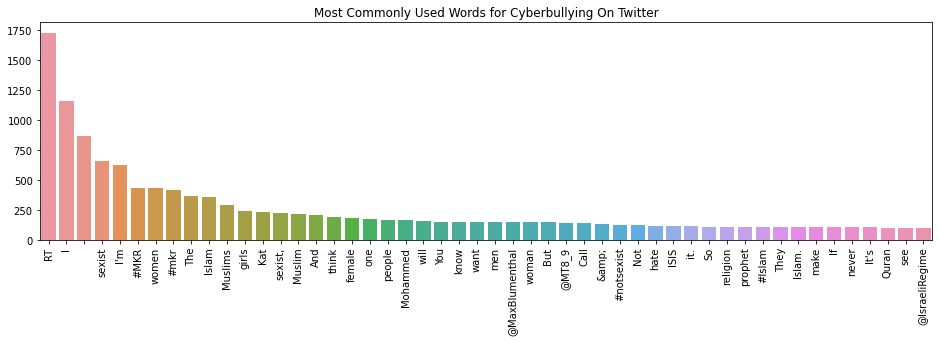

In [39]:
plt.subplots(figsize=(16,4))
plt.title("Most Commonly Used Words for Cyberbullying On Twitter")
sns.barplot(word_twitter[:50],ct_twitter[:50])
plt.xticks(rotation=90)
plt.show()

In [40]:
def create_word_cloud(text):
    wc = WordCloud(background_color = 'white', width = 600, height = 600,stopwords=STOPWORDS)
    wc.generate_from_text(text)
    wc.to_file('twitter_word_count.png')


In [41]:
rep_word=""
for i in range(0,len(word_twitter)):
    rep_word=rep_word+word_twitter[i]+" "
#rep_word

In [42]:
create_word_cloud(rep_word)

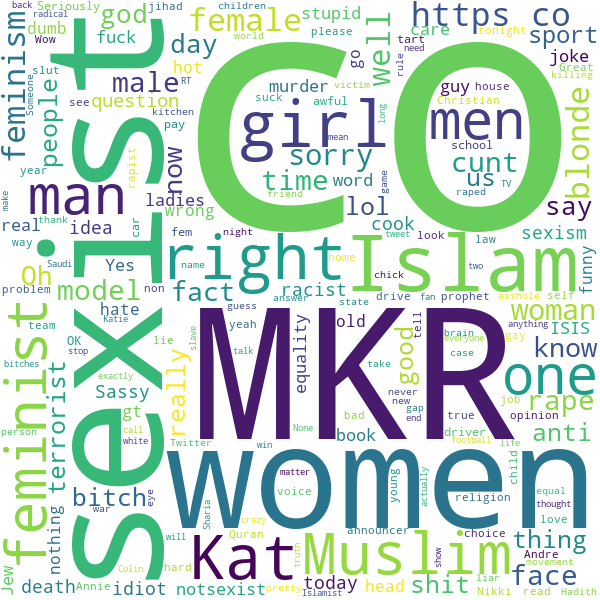

In [43]:
Image.open('./twitter_word_count.png')

# Youtube Data

In [44]:
df_yt=pd.read_csv('/content/drive/MyDrive/Final Year Project/data/youtube_parsed_dataset.csv')
df_yt.head(5)

,index,UserIndex,Text,Number of Comments,Number of Subscribers,Membership Duration,Number of Uploads,Profanity in UserID,Age,oh_label
0,0,X1,Does N.e.bodyelse Hear her Crazy ass Screamin ...,10,1,3,3,0,15,0
1,1,X2,There are so many things that are incorrect wi...,3,0,6,5,0,31,0
2,2,X3,3:26 hahah my boyfriend showed this song to me...,7,0,3,5,0,43,1
3,3,X2218,dick beyonce fuck y a ass hole you are truely ...,34,0,3,5,0,44,1
4,4,X5,DongHaeTaemin and Kai ;A; luhansehun and bacon...,11,173,5,5,0,21,0


In [45]:
df_yt.shape

(3464, 10)

In [46]:
df_yt.isna().any()

index                    False
UserIndex                False
Text                     False
Number of Comments       False
Number of Subscribers    False
Membership Duration      False
Number of Uploads        False
Profanity in UserID      False
Age                      False
oh_label                 False
dtype: bool

In [47]:
pos_count_yt=df_yt['oh_label'].value_counts()[1]
normal_count_yt=df_yt['oh_label'].value_counts()[0]
tot=df_yt.shape[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


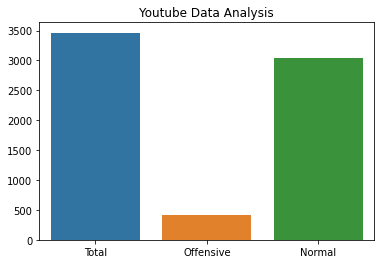

In [48]:
plt.title("Youtube Data Analysis")
sns.barplot(['Total','Offensive','Normal'],[tot,pos_count_yt,normal_count_yt])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


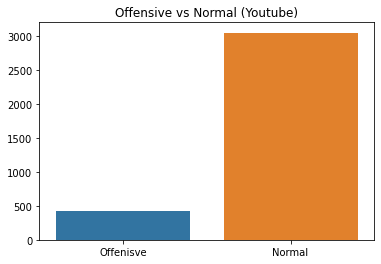

In [49]:
plt.title("Offensive vs Normal (Youtube)")
sns.barplot(["Offenisve","Normal"],[pos_count_yt,normal_count_yt])
plt.show()

In [50]:
df_temp=df_yt[df_yt['oh_label']==1]

In [51]:
age_yt=set(df_temp['Age'])

In [52]:
lst_age=list(df_temp['Age'])
age_yt_ct=[]
for i in age_yt:
    age_yt_ct.append(lst_age.count(i))

In [53]:
age_dict=dict(zip(age_yt,age_yt_ct))

In [54]:
print(age_dict)

{13: 1, 14: 14, 15: 15, 16: 21, 17: 18, 18: 15, 19: 27, 20: 23, 21: 48, 22: 37, 23: 15, 24: 16, 25: 10, 26: 12, 27: 16, 28: 9, 29: 9, 30: 9, 31: 13, 32: 7, 33: 6, 34: 7, 35: 4, 36: 4, 37: 4, 38: 2, 39: 5, 40: 2, 41: 4, 42: 6, 43: 7, 44: 2, 46: 2, 47: 4, 49: 1, 50: 1, 51: 3, 53: 1, 54: 1, 55: 1, 56: 1, 59: 1, 60: 1, 61: 1, 62: 2, 63: 1, 64: 1, 67: 1, 71: 1, 75: 1, 91: 1, 110: 2, 111: 1}


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


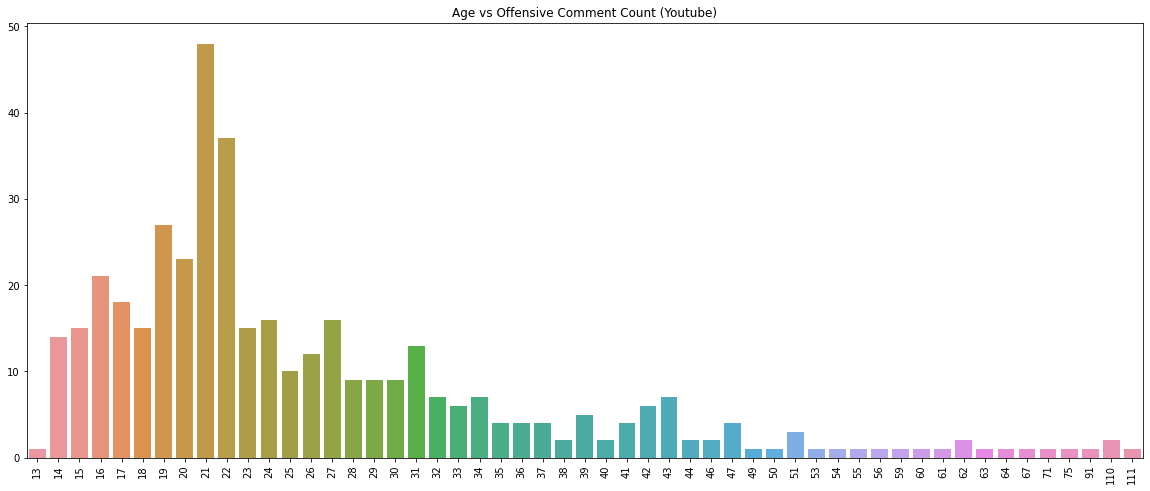

In [55]:
plt.subplots(figsize=(20,8))
plt.title("Age vs Offensive Comment Count (Youtube)")
sns.barplot(list(age_dict.keys()),list(age_dict.values()))
plt.xticks(rotation=90)
plt.show()

In [56]:
yt_txt=list(df_temp['Text'].astype('str'))

In [57]:
st_yt=""
for i in yt_txt:
    st_yt=st_yt+i+" "
    

In [58]:
print(st_yt[:200])

3:26 hahah my boyfriend showed this song to me I love it Me tooo Is she having a seizure. Omg u have a corgi I am training for the Olympics and I am Russian You want some rapes... LOL dick beyonce fuc


In [59]:
words_yt=st_yt.split(" ")


In [60]:
set_yt1=set(words_yt)
set_yt=[]
for i in set_yt1:
    if i not in STOPWORDS:
        set_yt.append(i)
print(len(set_yt))

22993


In [61]:
word_count_yt=[]
for i in tqdm.tqdm(set_yt):
    word_count_yt.append(words_yt.count(i))

100%|██████████| 22993/22993 [00:44<00:00, 511.51it/s]


In [62]:
word_dict_yt=dict(zip(set_yt,word_count_yt))
word_dict_yt=sorted(word_dict_yt.items(), key=lambda x: x[1], reverse=True)

In [63]:
word_yt=[]
ct_yt=[]
for i in word_dict_yt:
    word_yt.append(i[0])
    ct_yt.append(i[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


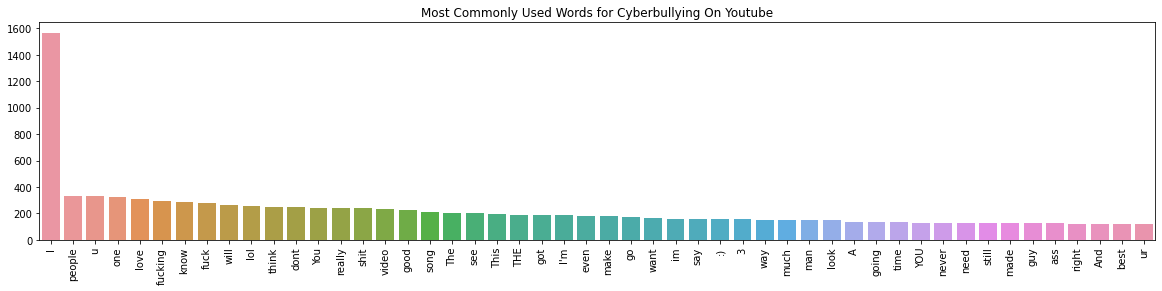

In [64]:
plt.subplots(figsize=(20,4))
plt.title("Most Commonly Used Words for Cyberbullying On Youtube")
sns.barplot(word_yt[:50],ct_yt[:50])
plt.xticks(rotation=90)
plt.show()

In [65]:
def create_word_cloud(text):
    wc = WordCloud(background_color = 'white', width = 600, height = 600,stopwords=STOPWORDS)
    wc.generate_from_text(text)
    wc.to_file("yt_word_count.png")


In [66]:
create_word_cloud(st_yt)

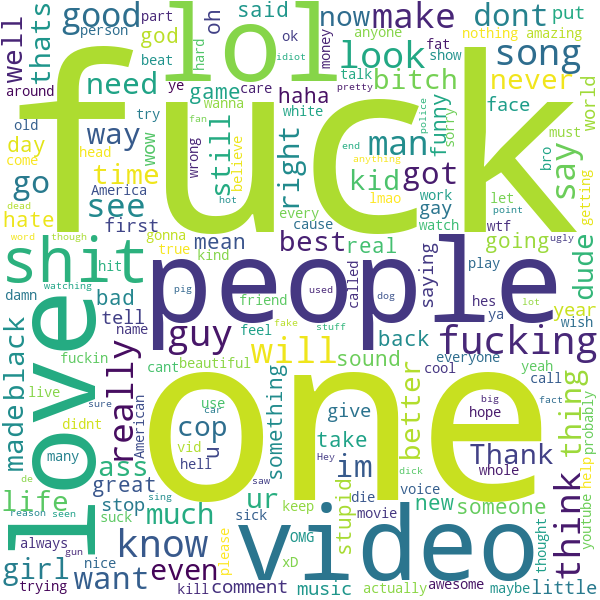

In [67]:
Image.open("./yt_word_count.png")

# Kaggle 

In [68]:
df_kaggle=pd.read_csv("/content/drive/MyDrive/Final Year Project/data/kaggle_parsed_dataset.csv")
df_kaggle.head(5)

,oh_label,Text
0,1,"""You fuck your dad."""
1,0,"""i really don't understand your point.\xa0 It ..."
2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,0,"""listen if you dont wanna get married to a man..."
4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [69]:
pos_count_kaggle=df_kaggle['oh_label'].value_counts()[1]
normal_count_kaggle=df_kaggle['oh_label'].value_counts()[0]
tot_kaggle=df_kaggle.shape[0]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


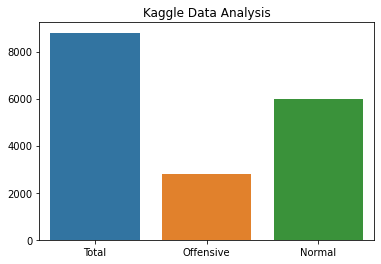

In [70]:
plt.title("Kaggle Data Analysis")
sns.barplot(['Total','Offensive','Normal'],[tot_kaggle,pos_count_kaggle,normal_count_kaggle])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


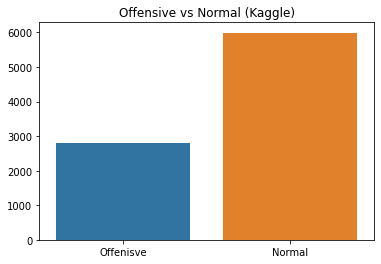

In [71]:
plt.title("Offensive vs Normal (Kaggle)")
sns.barplot(["Offenisve","Normal"],[pos_count_kaggle,normal_count_kaggle])
plt.show()

In [72]:
df_temp_kaggle=df_kaggle[df_kaggle['oh_label']==1]

In [73]:
df_temp_kaggle.head(5)

,oh_label,Text
0,1,"""You fuck your dad."""
7,1,"""shut the fuck up. you and the rest of your fa..."
8,1,"""Either you are fake or extremely stupid...may..."
9,1,"""That you are an idiot who understands neither..."
15,1,"""FOR SOME REASON U SOUND RETARDED. LOL. DAMN. ..."


In [74]:
lst_kaggle=df_temp_kaggle['Text'].astype(str)


In [75]:
st_kaggle=""
for i in lst_kaggle:
    st_kaggle=st_kaggle+i+" "


In [76]:
st_kaggle_words=st_kaggle.split(" ")

In [77]:
set_kaggle1=set(st_kaggle_words)
set_kaggle=[]
for i in set_kaggle1:
    if i not in STOPWORDS:
        set_kaggle.append(i)
len(set_kaggle)

16106

In [78]:
st_kaggle_words.sort()

In [79]:
ct_kaggle=[]
for i in tqdm.tqdm(set_kaggle):
    ct_kaggle.append(st_kaggle_words.count(i))


100%|██████████| 16106/16106 [00:26<00:00, 597.89it/s]


In [80]:
word_dict_kaggle=dict(zip(set_kaggle,ct_kaggle))
word_dict_kaggle=sorted(word_dict_kaggle.items(), key=lambda x: x[1], reverse=True)

In [81]:
word_kaggle=[]
ct_kaggle=[]
for i in word_dict_kaggle:
    word_kaggle.append(i[0])
    ct_kaggle.append(i[1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


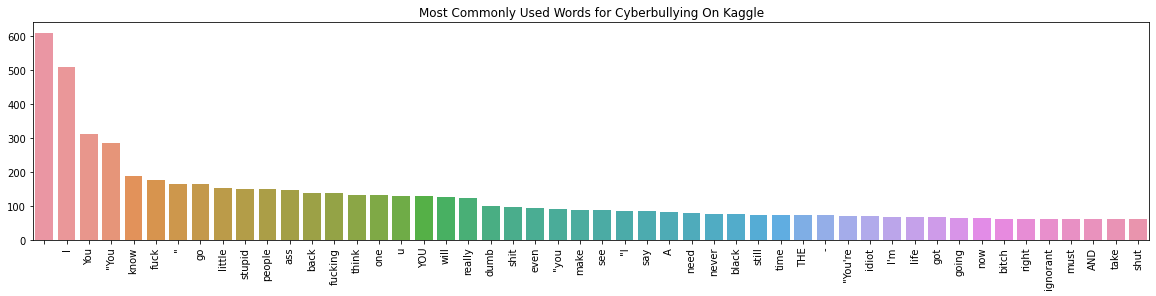

In [82]:
plt.subplots(figsize=(20,4))
plt.title("Most Commonly Used Words for Cyberbullying On Kaggle")
sns.barplot(word_kaggle[:50],ct_kaggle[:50])
plt.xticks(rotation=90)
plt.show()


In [83]:
def create_word_cloud(text):
    wc = WordCloud(background_color = 'white', width = 600, height = 600,stopwords=STOPWORDS)
    wc.generate_from_text(text)
    wc.to_file("kaggle_word_cloud.png")

In [84]:
create_word_cloud(st_kaggle)

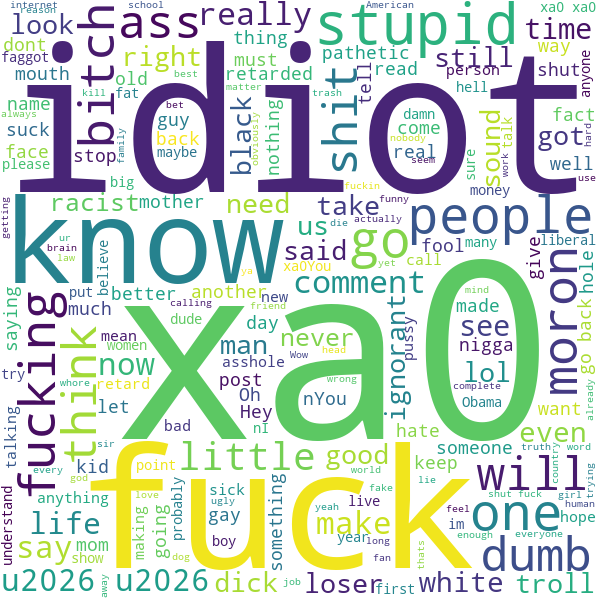

In [85]:
Image.open("./kaggle_word_cloud.png")

# Preprocessing

In [86]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [87]:
df=pd.read_csv("/content/drive/MyDrive/Final Year Project/data/Final Combined.csv")
df.head(5)

,Unnamed: 0,oh_label,Text
0,0,1,"""You fuck your dad."""
1,1,0,"""i really don't understand your point.\xa0 It ..."
2,2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,"""listen if you dont wanna get married to a man..."
4,4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."


In [88]:
df.dropna()

,Unnamed: 0,oh_label,Text
0,0,1,"""You fuck your dad."""
1,1,0,"""i really don't understand your point.\xa0 It ..."
2,2,0,"""A\\xc2\\xa0majority of Canadians can and has ..."
3,3,0,"""listen if you dont wanna get married to a man..."
4,4,0,"""C\xe1c b\u1ea1n xu\u1ed1ng \u0111\u01b0\u1edd..."
...,...,...,...
40607,3459,1,She pretty I love this song I miss the old kel...
40608,3460,0,Status-Online Im ZxkillergirlzX! I'm Zxkillerg...
40609,3461,0,JR so cute EXO M Better I agree like yeah yeah...
40610,3462,0,! !


In [89]:
X=list(df['Text'].astype("str"))
X[:5]

['"You fuck your dad."',
 '"i really don\'t understand your point.\\xa0 It seems that you are mixing apples and oranges."',
 '"A\\\\xc2\\\\xa0majority of Canadians can and has been wrong before now and will be again.\\\\n\\\\nUnless you\'re supportive of the idea that nothing is full proof or perfect so you take your chances and if we should inadvertently kill your son or daughter then them\'s the breaks and we can always regard you as collateral damage like in wartime - and sorry, but\\\\xc2\\\\xa0the cheques in the mail. "',
 '"listen if you dont wanna get married to a man or a women DONT DO IT. what would it bother you if gay people got married stay in your lane do you let them do them. And your god is so nice but quick to judg if your not like him, thought you wasnt suppose to judge people."',
 '"C\\xe1c b\\u1ea1n xu\\u1ed1ng \\u0111\\u01b0\\u1eddng bi\\u1ec3u t\\xecnh 2011 c\\xf3 \\xf4n ho\\xe0 kh\\xf4ng ? \\nC\\xe1c ng\\u01b0 d\\xe2n ng\\u1ed3i cu\\xed \\u0111\\u1ea7u chi\\u1ee5 

In [90]:
sen_len=[]
for i in X:
    sen_len.append(len(i))
print(len(sen_len))

40612


In [91]:
df_len=pd.DataFrame(sen_len)
df_len.describe()

,0
count,40612.000000
mean,195.965306
std,483.792034
min,2.000000
25%,60.000000
50%,102.000000
75%,138.000000
max,20030.000000


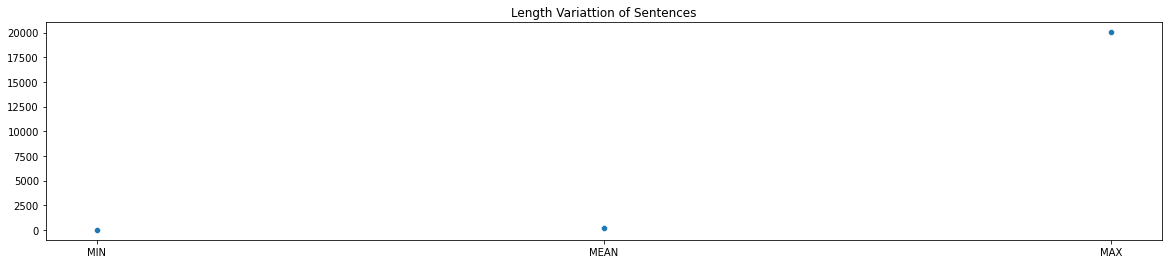

In [92]:
plt.subplots(figsize=(20,4))
plt.title("Length Variattion of Sentences")
sns.scatterplot(x=["MIN","MEAN","MAX"],y=[df_len.min(axis=0)[0],df_len.mean(axis=0)[0],df_len.max(axis=0)[0]])
plt.show()

In [93]:
st_final=""
for i in tqdm.tqdm(X):
    st_final+=(i[1:len(i)-1])


100%|██████████| 40612/40612 [00:00<00:00, 385505.50it/s]


In [94]:
filters_custom=set(st_final)

In [95]:
sent=st_final.split(" ")
all_words=len(sent)

In [96]:
dict_len=len(set(sent))
print(dict_len,all_words)

170285 1358303


In [97]:
st_filter=""
for i in filters_custom:
    st_filter+=i
st_filter+="!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n"
print(st_filter)


è😘😫😳👦🎶op😢FA”صá😆👊x😍M:✨😴🐀0😨😉😲🎈💬_“N>ğ🐎► Y@"! 😡👏r–™👋😔R6😤,G💐)🙈👎グ☕'eK%#⚡👹h😰.😅🐕🙌f❤☺t🔖
😝🍊😦&ن<ى🙀D♣😒👉u⃣a🙉👔😠{m+g♦ب★😓£ı🐸💉SsZل🍴|ン🍳🙋VリソH😩*$ş•😣😂😊😛nL😋…🍗♠プ[^🙍😀🍓(✊WBŞ😃½;💩2▶😭🚬T📷غ😕]🐧👢📖💦🍦98}`​kク🍌5lJ\👸iç👈?👧🔥🙊😐E👍O👯é🔵ة’♥ラv😈👓jāà‘-=ي♨🙅😜コê😷ëîdQ4—w👿Uا😄📺⚠qzP😱7️🐷💋💁/1~ü👌رbÇc🔫😁3🍋💰I🍏X😻قy✌😑Cف🍩!#$%&()*+,-./:;<=>?@[\]^_`{|}~	



In [98]:
for i in st_filter:
    if i.lower() in "0123456789abcdefghijklmnopqrstuvwxyz":
        st_filter=st_filter.replace(i,'')
print(st_filter)
        

è😘😫😳👦🎶😢”صá😆👊😍:✨😴🐀😨😉😲🎈💬_“>ğ🐎► @"! 😡👏–™👋😔😤,💐)🙈👎グ☕'%#⚡👹😰.😅🐕🙌❤☺🔖
😝🍊😦&ن<ى🙀♣😒👉⃣🙉👔😠{+♦ب★😓£ı🐸💉ل🍴|ン🍳🙋リソ😩*$ş•😣😂😊😛😋…🍗♠プ[^🙍😀🍓(✊Ş😃½;💩▶😭🚬📷غ😕]🐧👢📖💦🍦}`​ク🍌\👸ç👈?👧🔥🙊😐👍👯é🔵ة’♥ラ😈👓āà‘-=ي♨🙅😜コê😷ëî—👿ا😄📺⚠😱️🐷💋💁/~ü👌رÇ🔫😁🍋💰🍏😻ق✌😑ف🍩!#$%&()*+,-./:;<=>?@[\]^_`{|}~	



In [99]:
tokenizer=Tokenizer(num_words=dict_len,filters=st_filter,lower=True,oov_token="UNK")
tokenizer.fit_on_texts(X)

In [100]:
len(tokenizer.word_index)

73984

In [101]:
X_train=tokenizer.texts_to_sequences(X)
X_train_padded=pad_sequences(X_train,maxlen=50,padding='post',truncating='post')

In [102]:
X_train_padded[0]

array([  4,  87,  21, 637,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

In [103]:
Y_train=df['oh_label'].astype('float')

In [104]:
type(Y_train[0])

numpy.float64

In [105]:
set(Y_train)

{0.0, 1.0}

# The Parameters

In [106]:
word_dict_len=len(tokenizer.word_index)
embed_dim=128
in_len=50

# The Model

In [107]:
import tensorflow
from tensorflow.keras.models import Sequential 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Bidirectional,LSTM,Dense,Dropout
from tensorflow.keras.utils import to_categorical

In [108]:
tensorflow.__version__

'2.6.0'

In [109]:
model=Sequential()
model.add(Embedding(word_dict_len,embed_dim,input_length=in_len))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(in_len,return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(in_len*2)))
model.add(Dropout(0.2))
model.add(Dense(in_len*2,activation="relu"))
model.add(Dense(in_len//2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 50, 128)           9469952   
_________________________________________________________________
dropout (Dropout)            (None, 50, 128)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 100)           71600     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 100)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               160800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               2

In [110]:
model.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [111]:
 hist=model.fit(X_train_padded,Y_train,epochs=5,validation_split=0.2)

Epoch 1/5
1016/1016 [==============================] - 85s 72ms/step - loss: 0.3599 - accuracy: 0.8464 - val_loss: 0.3567 - val_accuracy: 0.8473
Epoch 2/5
1016/1016 [==============================] - 72s 71ms/step - loss: 0.1954 - accuracy: 0.9229 - val_loss: 0.3298 - val_accuracy: 0.8726
Epoch 3/5
1016/1016 [==============================] - 72s 70ms/step - loss: 0.0999 - accuracy: 0.9632 - val_loss: 0.3964 - val_accuracy: 0.8829
Epoch 4/5
1016/1016 [==============================] - 71s 70ms/step - loss: 0.0603 - accuracy: 0.9780 - val_loss: 0.6280 - val_accuracy: 0.8566
Epoch 5/5
1016/1016 [==============================] - 71s 70ms/step - loss: 0.0419 - accuracy: 0.9846 - val_loss: 0.6576 - val_accuracy: 0.8674


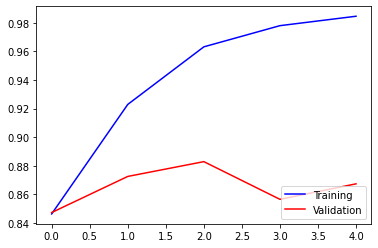

In [112]:
plt.plot(hist.history['accuracy'],c='b',label='Training')
plt.plot(hist.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

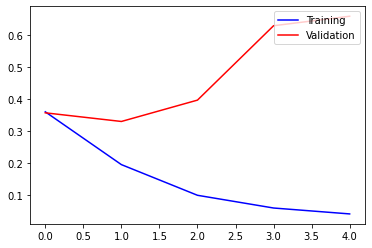

In [113]:
plt.plot(hist.history['loss'],c='b',label='Training')
plt.plot(hist.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

In [114]:
mp={0:"Non Offensive",1:"Offensive"}

In [146]:
def predict(s):
    X_tes=[]
    X_tes.append(s)
    X_test=tokenizer.texts_to_sequences(X_tes)
    X_test_padded=pad_sequences(X_test,maxlen=in_len,padding='post',truncating='post')
    sent=(model.predict(X_test_padded))
    val=sent[0][0]
    pval=0
    nval=0
    emt1=0
    emt2=0
    if (val>0.5):
      pval=val
      nval=1-val
      emt1=(pval/1)*100
      emt2=(nval/1)*100
    else:
      pval=val
      nval=0.5-val
      emt1=(pval/0.5)*100
      emt2=(nval/0.5)*100
    sent1=0
    if val>0.5:
      sent1=1
    print(val,emt1,emt2)
    print("The Predicted Sentiment is",mp[sent1])
    plt.subplots(figsize=(16,4))
    plt.title("Percentage of Probability")
    sns.barplot(['Offensive','Non offensive'],[emt1,emt2])
    plt.show()

0.9889465 98.89464974403381 1.1053502559661865
The Predicted Sentiment is Offensive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


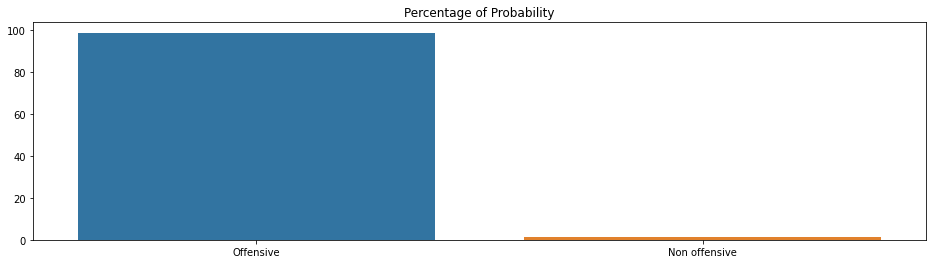

In [150]:
predict("Bitch you are so full of shit")


0.00018387221 0.03677444183267653 99.96322555816732
The Predicted Sentiment is Non Offensive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


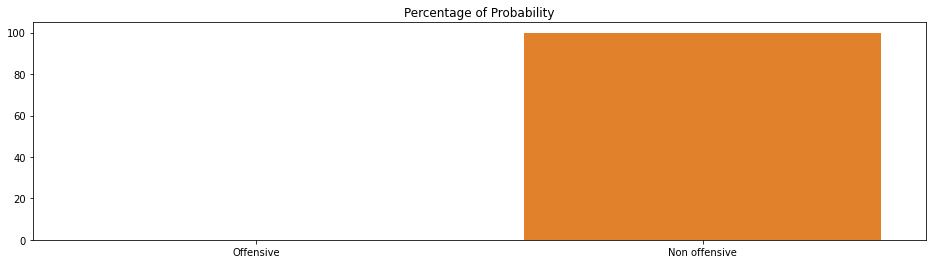

In [147]:
predict("Such a great day to be alive")


0.95254344 95.25434374809265 4.745656251907349
The Predicted Sentiment is Offensive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


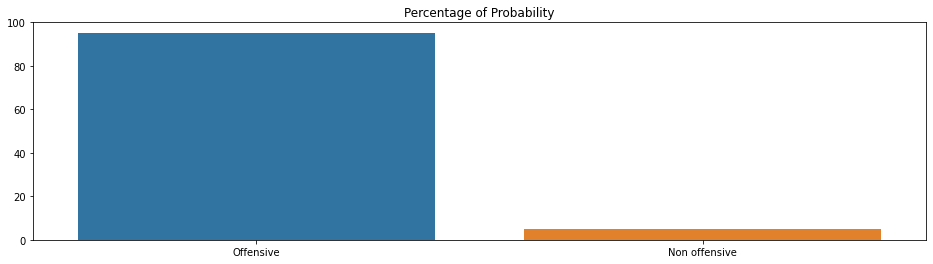

In [148]:
predict("You can try if you want but there is a good chance you are as stupid as you look")

0.49278802 98.55760335922241 1.442396640777588
The Predicted Sentiment is Non Offensive


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


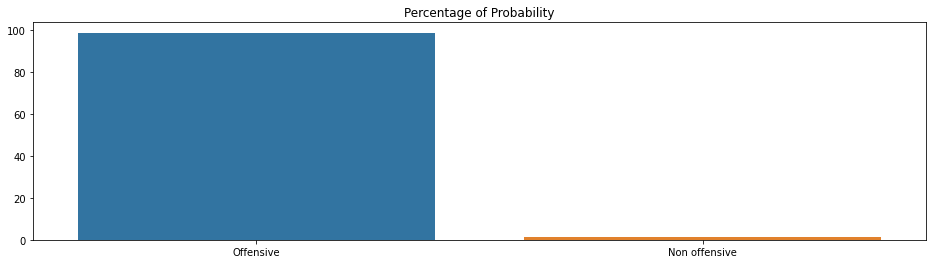

In [149]:
predict("You are so retarded its funny")